O objetivo desse trabalho é elaborar um algoritmo capaz de prever a evasão de um determinado funcionário dado algumas caracteristicas de seu perfil e algumas avaliações de desempenho realizadas na empresa. 

A justificativa para a elaboração desse projeto é evitar uma série de problemas que a empresa pode passar ao demitir ou caso o funcionário decida sair por conta própria. Dentre esses problemas, podemos citar: 

1- Atrasos nos projetos liderados pelo funcionário que evadiu a empresa, que prejudicam a imagem da empresa perante os clientes e parceiros.

2- Custos elevados são desviados para manter um departamento de recrutamento.

3- São gastos valiosos recursos para o treinamento de um novo funcionário

Foi feita uma analise de dados profunda a fim de entender os reais motivos que fazem os funcionários deixarem a empresa. Interessante observar que, para essa base de dados, o salário dos funcionários não foi um fator relevante para a tomada de decisão de sair ou não da empresa. Além disso, se mostrou bastante as avaliações de safistação que a empresa faz com o funcionário, mostrando-se uma ferramenta valiosa para desenvolver planos de ação para a retenção de funcionários. 

In [203]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

Carregamento e manipulação dos dados

In [204]:
general_data = pd.read_csv('/content/general_data.csv')
 
general_data.loc[general_data['Attrition'] == 'No', 'Attrition'] = 0
general_data.loc[general_data['Attrition'] == 'Yes', 'Attrition'] = 1
general_data['Attrition'] = general_data['Attrition'].astype(np.int64)

In [205]:
general_data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.367780,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Vemos aqui que de todos funcionários que são contratados na empresa, 16% deles saem, seja por decisão própria, ou porque foram demitidos. Nessa base de dados, os funcionários que foram demitidos estão representados na coluna 'Attrition'.

In [206]:
df = general_data.groupby(general_data['MaritalStatus']).mean()
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]

fig = px.bar(df, x = df.index, y = 'Attrition', width = 500, height = 400, 
             title = 'Evasão por Estado Civil')
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))
fig.show()

In [207]:
df.shape[0]

3

De todos os solteiros, 25% deles saíram da empresa, enquanto que divorciados e casados evadiram 10% e 12%, respectivamente.
Pode-se ter uma relação com a idade. 

In [208]:
df = general_data.groupby(pd.cut(general_data["Age"], 
                                 np.arange(17, 61, 8))).mean()
df['Attrition']

Age
(17, 25]    0.357724
(25, 33]    0.215078
(33, 41]    0.106157
(41, 49]    0.091270
(49, 57]    0.125000
Name: Attrition, dtype: float64

In [209]:
fig = px.bar(df, x = 'Age', y = 'Attrition', width = 500, height = 400, 
             title = 'Evasão por Idade')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df['Age'], name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

In [210]:
mean_att

[0.16122448979591836,
 0.16122448979591836,
 0.16122448979591836,
 0.16122448979591836,
 0.16122448979591836]

Como pode ser visualizado acima, os maiores índices de evasão ocorrem em funcionarios de até 35 anos. Na faixa de 18 a 25 anos, a evasão é de 36%, enquanto que na faixa de 22%. As demais faixas de idade, tem evasões que giram em torno de 10%. 

In [211]:
df = general_data.groupby(pd.cut(general_data["YearsAtCompany"], 
                                 np.arange(-1, 41, 3))).mean()

df['Attrition']

YearsAtCompany
(-1, 2]     0.298246
(2, 5]      0.138249
(5, 8]      0.117886
(8, 11]     0.119658
(11, 14]    0.071429
(14, 17]    0.073171
(17, 20]    0.058824
(20, 23]    0.096774
(23, 26]    0.071429
(26, 29]    0.000000
(29, 32]    0.285714
(32, 35]    0.166667
(35, 38]    0.000000
Name: Attrition, dtype: float64

In [212]:
fig = px.scatter(df, x = 'YearsAtCompany', y = 'Attrition', width = 500, 
                 height = 400, 
                 title = 'Evasão por Tempo de Trabalho na Empresa')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df['YearsAtCompany'], 
                         name = 'Evasão média', line = dict(dash = 'dash')))

fig.show()

Vemos que o tempo de permanência na empresa é fundamental no percentual de evasão. Quase 30% dos empregados saem da empresa antes de completarem 2 anos. Caso queiram evitar esse fato, a empresa poderia promover incentivos para funcionário ao completarem determinado tempo de empresa.

In [213]:
df = general_data.groupby(pd.cut(general_data["TotalWorkingYears"], 
                                 np.arange(-1, 41, 4))).mean()
df ['Attrition']

TotalWorkingYears
(-1, 3]     0.380567
(3, 7]      0.190476
(7, 11]     0.132567
(11, 15]    0.109677
(15, 19]    0.109244
(19, 23]    0.065831
(23, 27]    0.094340
(27, 31]    0.050000
(31, 35]    0.083333
(35, 39]    0.000000
Name: Attrition, dtype: float64

In [214]:
fig = px.scatter(df, x = 'TotalWorkingYears', y = 'Attrition', width = 500, 
                 height = 400, title = 'Evasão por Tempo Total de Experiência')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df['TotalWorkingYears'], 
                         name = 'Evasão média', line = dict(dash = 'dash')))

fig.show()

Vemos também que profissionais que tem poucos anos de experiência tem uma maior chance de mudarem de trabalho. Mais de 38% dos Funcionários nos primeiros 3 anos de experiência abandonaram a empresa e, esse percentual chegou a 19% nos funcionários que tem entre de 3 anos e 7 anos de experiência. 

In [215]:
df = general_data.groupby(general_data['NumCompaniesWorked']).mean()
df ['Attrition']

NumCompaniesWorked
0.0    0.117747
1.0    0.188062
2.0    0.109589
3.0    0.101266
4.0    0.120482
5.0    0.245989
6.0    0.230769
7.0    0.229730
8.0    0.122449
9.0    0.230769
Name: Attrition, dtype: float64

In [216]:
fig = px.scatter(df, x = df.index, y = 'Attrition', width = 600, height = 400, 
                 title = 'Evasão por Número de Empresas Trabalhadas')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))
fig.show()

No gráfico acima fica bastante claro que o número de empresas que o funcionário já trabalhou é um importante parâmetro na escolha de um funcionário. Para as pessoas que já trabalharam em mais de 4 empresas, mais de 20% delas deixaram a empresa atual. 

In [217]:
df = general_data.groupby(pd.cut(general_data["MonthlyIncome"], 
                                 np.arange(10000, 220000, 25000))).mean()
df ['Attrition']

MonthlyIncome
(10000, 35000]      0.171247
(35000, 60000]      0.167800
(60000, 85000]      0.172589
(85000, 110000]     0.145833
(110000, 135000]    0.040000
(135000, 160000]    0.205128
(160000, 185000]    0.136364
(185000, 210000]    0.133333
Name: Attrition, dtype: float64

Apesar do salário ser um dos parâmetros que muitos funcionários decidem trocar de empresa, aparentemente nesse caso a renda parece não ser um dos motivos que fazem os empregados dessa empresa a deixarem. 

In [218]:
df = general_data.groupby(general_data['JobRole']).mean()
df ['Attrition']

JobRole
Healthcare Representative    0.145038
Human Resources              0.134615
Laboratory Technician        0.162162
Manager                      0.137255
Manufacturing Director       0.110345
Research Director            0.237500
Research Scientist           0.181507
Sales Executive              0.168712
Sales Representative         0.144578
Name: Attrition, dtype: float64

In [219]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 1000, height = 500, 
             title = 'Evasão por Posição')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

As áreas de pesquisa da empresa tem maior percentual de evasão quando comparado ao restante da empresa. Quase 24% dos Diretores de Pesquisa que foram contratados saíram da empresa, enquanto que 18% dos Cientistas tiveram o mesmo destino. Talvés seja necessário um esforço para entender a causa raíz desse nível elevado de saídas na área de pesquisa. 

In [220]:
df = general_data.groupby(general_data['EducationField']).mean()
df ['Attrition']

EducationField
Human Resources     0.407407
Life Sciences       0.166667
Marketing           0.157233
Medical             0.161638
Other               0.121951
Technical Degree    0.113636
Name: Attrition, dtype: float64

In [221]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 900, height = 400, 
             title = 'Evasão por Área de Formação')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

No gráfico acima é expressivo o percentual de pessoas que se formaram na área de Recursos Humanos e saíram da empresa (mais de 40%). Estranho é que o percentual de evasão de pessoas que foram contratadas para atuar na área de RH é de apenas 14%. Isso pode significar que pessoas que se formaram na área de RH estão sendo contratadas para atuarem em áreas distintas da área de formação. 

In [222]:
df[['Attrition', 'Age', 'DistanceFromHome', 'Education', 
    'TotalWorkingYears', 'YearsSinceLastPromotion']]

,Attrition,Age,DistanceFromHome,Education,TotalWorkingYears,YearsSinceLastPromotion
EducationField,,,,,,
Human Resources,0.407407,33.740741,11.000000,2.777778,8.518519,1.185185
Life Sciences,0.166667,36.904290,9.285479,2.920792,11.363687,2.067657
Marketing,0.157233,36.062893,9.314465,2.886792,10.962264,2.100629
Medical,0.161638,37.053879,9.088362,2.881466,11.367171,2.379310
Other,0.121951,36.865854,8.707317,3.109756,10.219512,2.024390
Technical Degree,0.113636,38.280303,8.916667,2.924242,12.196970,2.477273


A tabela acima tenta explicar o porquê da elevada evasão de profissionais que se formaram na área de Recursos Humanos. Em primeiro lugar, vamos a idade média desses profissionais, comparados com o restante da empresa. A média de idade de todos os funcionários é de quase 37 anos, já a dos funcionários de RH é de quase 34. Como vimos que a idade possui uma forte relação com a evasão da empresa, talves seja interessante um acompanhamento profissional mais de perto, principalmente dos jovens profissionais.  

In [223]:
df = general_data.groupby(general_data['BusinessTravel']).mean()
df ['Attrition']

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
Name: Attrition, dtype: float64

In [224]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 600, height = 400, 
             title = 'Evasão por Frequência de Viagens')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

Viagens Frequentes também representam um motivo pelo qual os funcionários saem da empresa, sendo que, dos empregados que viajam frequentemente, quase 25% deles trocaram de empresa. 

In [225]:
general_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Agora, vamos analisar o arquivo contendo os pontos de frequência dos funcionários. Nas primeiras linhas de código fazemos o carregamento e algum tratamento necessário e por fim, carregamos no Dataframe principal a média de horas trabalhadas por cada funcionário.

In [226]:
in_df = pd.read_csv('/content/in_time.csv')
out_df = pd.read_csv('/content/out_time.csv')

In [227]:
from datetime import datetime
 
def conv_to_date(x):
  if type(x) == str:
    date_time_obj1 = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return date_time_obj1
  
def conv_to_hour(x):
  if type(x) == pd._libs.tslibs.timedeltas.Timedelta:
    return x.total_seconds()/3600

In [228]:
in_df = in_df.applymap(conv_to_date)
out_df = out_df.applymap(conv_to_date)
 
working_hours = out_df - in_df
working_hours = working_hours.applymap(conv_to_hour)

In [229]:
general_data['MeanWorkedHours'] = working_hours.mean(axis = 1)

In [230]:
general_data.groupby(general_data['Attrition']).mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanWorkedHours
Attrition,,,,,,,,,,,,,,,,,
0,37.561233,9.227088,2.919708,1.0,2208.139497,2.068938,65672.595296,2.648480,15.157340,8.0,0.796431,11.860780,2.827251,7.369019,2.234388,4.367397,7.582297
1,33.607595,9.012658,2.877637,1.0,2191.767932,2.037975,61682.616034,2.936351,15.481013,8.0,0.780591,8.255289,2.654008,5.130802,1.945148,2.852321,8.317264


In [231]:
general_data.describe()['MeanWorkedHours']

count    4410.000000
mean        7.700792
std         1.340218
min         5.950504
25%         6.673333
50%         7.406761
75%         8.368703
max        11.030960
Name: MeanWorkedHours, dtype: float64

In [232]:
df = general_data.loc[general_data['Attrition'] == 0]
df1 = general_data.loc[general_data['Attrition'] == 1]


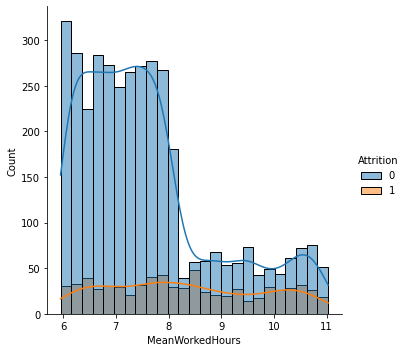

In [233]:
import seaborn as sns

sns.displot(data = general_data, x="MeanWorkedHours", kde=True, 
            hue = 'Attrition')

No gráfico acima vemos que as a distribuição das pessoas que saem da empresa(Attrition = 1) é parcialmente homogênea em relação à média de horas trabalhadas, no entanto, das pessoas que permaneceram na empresa, a grande maioria delas trabalha menos de 8 horas. Isso pode indicar  que, o percentual de pessoas que trabalham mais de 8 horas e sairam da empresa é relativamente maior do que esse percentual de pessoas que trabalharam menos de 8 horas.

In [234]:
df = general_data.groupby(pd.cut(general_data["MeanWorkedHours"], 
                                 np.arange(5.5, 11.5, 0.5))).mean()
df ['Attrition']

MeanWorkedHours
(5.5, 6.0]      0.130435
(6.0, 6.5]      0.101542
(6.5, 7.0]      0.105118
(7.0, 7.5]      0.079343
(7.5, 8.0]      0.136304
(8.0, 8.5]      0.271523
(8.5, 9.0]      0.307692
(9.0, 9.5]      0.287879
(9.5, 10.0]     0.242604
(10.0, 10.5]    0.367925
(10.5, 11.0]    0.256757
Name: Attrition, dtype: float64

In [235]:
fig = px.bar(df, x = df["MeanWorkedHours"], y = 'Attrition', width = 600, 
             height = 400, 
             title = 'Evasão pela Média de Horas Trabalhadas Diariamente')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df["MeanWorkedHours"], 
                         name = 'Evasão média', line = dict(dash = 'dash')))

fig.show()

No gráfico acima fica claro que há um salto no percentual de pessoas que saem da empresa quando elas tem uma jornada de trabalho diária maior que 8 horas. 

E vamos agora analisar a avaliação feita com os gerentes de cada um dos funcionários, bem como a avaliação do funcioário em relação à empresa.

In [236]:
manager_df = pd.read_csv('/content/manager_survey_data.csv')
employee_df = pd.read_csv('/content/employee_survey_data.csv')

In [237]:
manager_df.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [238]:
employee_df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Temos então 5 novos parâmetros:

1- Avaliação do gerente em relação ao nível de envolvimento do empregado com o trabalho.

2- Avaliação do gerente em relação à performance do funcionário.

3- Avaliação do funcionário em relação à satisfação com o ambiente de trabalho.

4- Avaliação do funcionário em relação à satisfação com a sua posição.

5- Avaliação do funcionário em relação ao balanço entre sua vida pessoal e profissional.

In [239]:
general_data['JobInvolvement'] = manager_df['JobInvolvement']
general_data['PerformanceRating'] = manager_df['PerformanceRating']
general_data['EnvironmentSatisfaction'] = employee_df['EnvironmentSatisfaction']
general_data['JobSatisfaction'] = employee_df['JobSatisfaction']
general_data['WorkLifeBalance'] = employee_df['WorkLifeBalance']

In [240]:
df = general_data.groupby(general_data["JobInvolvement"]).mean()
df ['Attrition']

JobInvolvement
1    0.216867
2    0.160000
3    0.153226
4    0.180556
Name: Attrition, dtype: float64

In [241]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 600, height = 400, 
             title = 'Evasão pela Nota de Envolvimento no Trabalho')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

In [242]:
df = general_data.groupby(general_data["PerformanceRating"]).mean()
df ['Attrition']

PerformanceRating
3    0.157556
4    0.181416
Name: Attrition, dtype: float64

In [243]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 450, height = 400, 
             title = 'Evasão pela Nota de Performance')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

Os dados gerados pela avaliação dos gerentes não se mostraram muito eficazes em prever o motivo da evasão de funcionários. O que podemos observar é que quanto menor o envolvimento do funcionário com o trabalho, maiores as tendência dele sair da empresa, possívelmente esse funcionário pode se sentir que não faz parte do time, fazendo com que ele procure novas oportunidades fora da empresa.

In [244]:
df = general_data.groupby(general_data["EnvironmentSatisfaction"]).mean()
df ['Attrition']

EnvironmentSatisfaction
1.0    0.252071
2.0    0.149533
3.0    0.137778
4.0    0.134183
Name: Attrition, dtype: float64

In [245]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 600, height = 400, 
             title = 'Evasão pela Nota de Safisfação com o Ambiente')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

In [246]:
df = general_data.groupby(general_data["JobSatisfaction"]).mean()
df ['Attrition']

JobSatisfaction
1.0    0.229070
2.0    0.164286
3.0    0.165533
4.0    0.114119
Name: Attrition, dtype: float64

In [247]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 600, height = 400, 
             title = 'Evasão pela Nota de Satisfação com o Trabalho')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

In [248]:
df = general_data.groupby(general_data["WorkLifeBalance"]).mean()
df ['Attrition']

WorkLifeBalance
1.0    0.313808
2.0    0.167812
3.0    0.142857
4.0    0.178414
Name: Attrition, dtype: float64

In [249]:
fig = px.bar(df, x = df.index, y = 'Attrition', width = 600, height = 400, 
             title = 'Evasão pela Nota do Balanço Vida/Trabalho')
mean_att = [general_data.describe()['Attrition'][1]]*df.shape[0]
fig.add_trace(go.Scatter(y = mean_att, x = df.index, name = 'Evasão média', 
                         line = dict(dash = 'dash')))

fig.show()

In [250]:
#Criando um dataframe de pessoas que avaliaram mal o balanço vida/trabalho e
# fazendo posteriormente o agrupamento com a satisfação com o trabalho

df = general_data.loc[general_data['WorkLifeBalance'] == 1]
df.groupby(['JobSatisfaction']).mean()['Attrition']

JobSatisfaction
1.0    0.470588
2.0    0.226415
3.0    0.380952
4.0    0.211268
Name: Attrition, dtype: float64

Em contrapartida, as avaliações realizadas pelos funcionários se mostraram métricas bastante importantes. Caso o funcionário avalie mal a satisfação com o trabalho, o ambiente de trabalho ou o balanço vida/trabalho, as chances de esse funcionário sair da empresa é de no mínimo 25%. Caso o funcionário avalie mal o balanço Vida/Trabalho e também a satisfação com o trabalho, essas chances sobem para 47%.

Criação do Algoritmo para calcular o percentual de chance de um funcionário com determinadas caracteristica sair da empresa.

In [251]:
df_ml = general_data

# removendo colunas que não tem relação com o rótulo
df_ml = df_ml.drop(['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'], 
                   axis = 1)

In [252]:
df_ml.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
MeanWorkedHours             0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [253]:
# removendo registros com valores vazios
df_ml = df_ml.dropna(axis = 0)

In [254]:
#trocando a posição do Rótulo dos Registros ('Attrition')
first_col = df_ml.pop('Attrition')
df_ml.insert(0, 'Attrition', first_col)

In [255]:
#criação dos vetores que serão usados de entrada no algoritmo
y_values = df_ml.iloc[:, 0].values
x_values = df_ml.iloc[:, 1:df_ml.shape[1]]

In [256]:
# Precisamos converter as colunas que contém elementos 
# categóricos em elementos discretos

colunas = df_ml.columns
colunas_str = []

for col in colunas:
  if type(df_ml[col][0]) == str:
    colunas_str.append(col)

colunas_str

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

Label Encoder

In [257]:
from sklearn.preprocessing import LabelEncoder

x_encode = pd.DataFrame(index=[1]*x_values.shape[0], columns=['a'])
#Criando os Encoders e já substituindo no dataframe principal
for i in colunas_str:
  globals()['label_encoder%s' % i] = LabelEncoder()
  lista = globals()['label_encoder%s' % i].fit_transform(x_values[i].values) 
  x_encode[i] = pd.DataFrame({i: lista})
  x_values[i] =  x_encode[i].values

x_values = x_values.iloc[:, :].values

Normalização dos Valores

In [258]:
from sklearn.preprocessing import StandardScaler 

scaler_data = StandardScaler()
x_values = scaler_data.fit_transform(x_values)

Criação do Algoritmo

In [259]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report)
  
svm = SVC(tol = 0.001, C= 8, kernel = 'rbf')
svm.fit(x_values,y_values)

previsoes = svm.predict(x_values)

cm_svm = confusion_matrix(y_values,previsoes)

precisao = cm_svm[1][1]/(cm_svm[1][0]+cm_svm[1][1])

In [260]:
cm_svm

array([[3603,    2],
       [  17,  678]])

In [261]:
# Acertividade ao classificar um registro como um funcionário 
# que saiu da empresa
precisao

0.9755395683453237

In [265]:
len(x_values)

4300

Após uma série de testes com os parâmetros do algoritmo, ele teve uma performance de classificação muito boa. Dos 3605 funcionários que ainda continuam na empresa, ele foi capaz de acertar 3603 respostas, mais de 99% do total. Já em relação aos funcionários que sairam da empresa, dos 695 que entram nesse grupo, o modelo foi capaz de acertar 678, mais de 97% de precisão.

Devemos ter em mente que a base de dados é desequilibrada em relação à classe de cada registro (se o funcionário saiu ou não da empresa). Dito isso, um valor base do percentual de acertos é obtido quando classificamos todos os valores da base de dados como sendo funcionários que se manteram na empresa, ou seja, temos um total de 4300 registros, sendo que 3605 dos funcionários ainda estão na empresa. Caso todos os registros sejam classificados como funcionários que permaneceram na empresa, o algoritmo teria percentual de acertos de quase 84% (3605/4300). Esse então é um valor base para decidirmos se o algoritmo tem uma boa performance. 

Vamos fazer agora um teste para verificar se houve overfitting no treinamento do algoritmo. Vamos usar a biblioteca cross_val para tirarmos essa possibilidade. Nesse teste, a base de dados foi dividida em 4 pedaços, sendo uma das 4 partes a base de dados para testes e as demais a base de dados para o treinamento do algoritmo (obs: Cada uma das 4 partes foi usada em um determinado momento como base de testes). Esse teste foi repedido 20 vezes, sendo que em cada uma das repetições os registros usados no treinamento e no teste do algotimo eram aleatoriamente selecionados.

In [262]:
from sklearn.model_selection import KFold, cross_val_score

resultados_svm = []
svm_cv = SVC(C= 8, kernel= 'rbf', tol= 0.001)


for i in range(20):
    kfold = KFold(n_splits=4,random_state=i,shuffle=True)
    scores = cross_val_score(svm_cv, x_values,y_values,cv=kfold)
    resultados_svm.append(scores.mean())

In [263]:
resultados_svm

[0.9690697674418605,
 0.9646511627906976,
 0.9616279069767443,
 0.9669767441860465,
 0.9651162790697674,
 0.9658139534883721,
 0.9676744186046511,
 0.9693023255813953,
 0.9637209302325582,
 0.9665116279069768,
 0.9711627906976745,
 0.9651162790697674,
 0.9611627906976744,
 0.9704651162790697,
 0.9611627906976744,
 0.9686046511627907,
 0.9641860465116279,
 0.9674418604651163,
 0.9641860465116279,
 0.9611627906976745]

In [264]:
import statistics as st

st.mean(resultados_svm), st.stdev(resultados_svm)

(0.9657558139534884, 0.003104432257948115)

A lista *resultados_svm* apresenta em cada uma de suas linhas a média da performance de 4 testes, quando cada uma das partes da base de dados foi divida em 4 pedaços. Podemos ver que cada um dos 20 resultados apresentam boa performance, e um desvio entre os valores muito baixo, significando que não há overfitting. 